In [1]:
# Import all libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# I import the data and save it in the dataframe dataDf
# I also add a column of 1's for matrix multiplication purposes

dataDf = pd.read_csv('regressionData.csv') 
dataDf['var1'] = 1

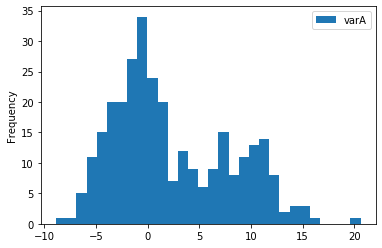

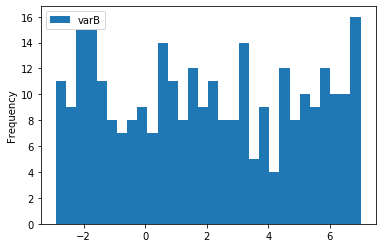

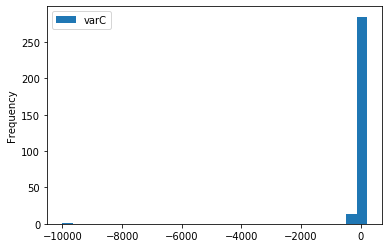

In [3]:
# I want to get a sense of how the data is distributed so I run a few plots on each of the variables.

dataDf[['varA']].plot(kind='hist', bins = 30)
plt.show()

dataDf[['varB']].plot(kind='hist', bins = 30)
plt.show()

dataDf[['varC']].plot(kind='hist', bins = 30)
plt.show()

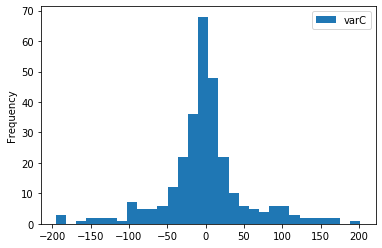

In [8]:
# varA and varB look consistent, but varC looks like it's got a large negative outlier in it. I'm going to drop the lowest 3 percentiles of data
# from varC and check again

dataDf2 = dataDf.copy()

dataDf2 = dataDf2[dataDf2['varC'].between(dataDf2['varC'].quantile(.03), dataDf2['varC'].quantile(1))]
dataDf2[['varC']].plot(kind='hist', bins = 30)
plt.show()

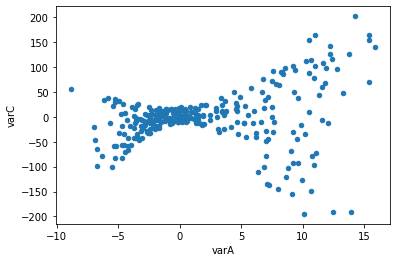

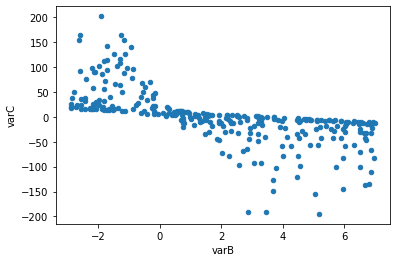

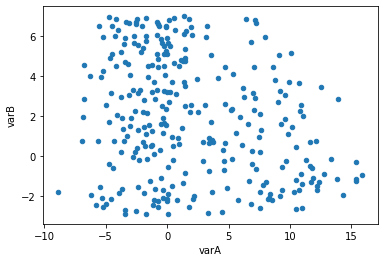

In [10]:
# That looks a lot better to me. Now because we're trying to use varA and varB to predict varC I'd like to see what their individual
# relationships look like

dataDf2.plot(kind='scatter',x='varA',y= 'varC')
plt.show()

dataDf2.plot(kind='scatter',x='varB',y= 'varC')
plt.show()

dataDf2.plot(kind='scatter',x='varA',y= 'varB')
plt.show()

In [90]:
# None of the data looks very linearly distributed to me, though there are some sorts of underlying structures in terms of how the scatter
# changes based on the x-axis.

# At this point I'm going to go ahead with a straightforward linear regression using matrix algebra. First let's split out a test and train set

np.random.seed(1979)

msk = np.random.rand(len(dataDf2)) < 0.9
train = dataDf2[msk]
test = dataDf2[~msk]

In [91]:
# I then convert to numpy matrices and calculate the values of the beta coefficients, the estimated values and the correlation between
# the estimated and actual values.

X = train[['var1', 'varA','varB']].values
Y = train[['varC']].values

beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
yhat = X.dot(beta_hat)

r = np.corrcoef(Y.T, yhat.T)
r

array([[1.       , 0.6645154],
       [0.6645154, 1.       ]])

In [92]:
# The model has some predictive power. Let me see how it performs over the test set.

Xtest = test[['var1', 'varA','varB']].values
Ytest = test[['varC']].values

yhattest = Xtest.dot(beta_hat)

r = np.corrcoef(Ytest.T, yhattest.T)
r

array([[1.        , 0.68503636],
       [0.68503636, 1.        ]])

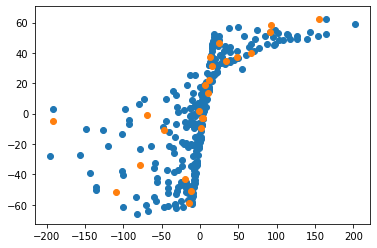

In [93]:
# Performance of the model is relatively consistent. Let's plot the actual vs the estimates to see how they line up.

plt.scatter(x = Y, y = yhat)
plt.scatter(x = Ytest, y = yhattest)

In [89]:
# There is a broad linear trend but it's not a very strong one. I'm going to try some feature engineering. 
# Let's try a product of varA and varB. This can help me tease out if there's any interactions in these two with predictive power.

dataDf3 = dataDf2.copy()
dataDf3['varD'] = dataDf3['varA']*dataDf3['varB']

In [82]:
# Let's try the same approach again on the new dataset. First we split out the data

np.random.seed(1979)

msk = np.random.rand(len(dataDf3)) < 0.9
train = dataDf3[msk]
test = dataDf3[~msk]

In [83]:
# Then we rebuild the model. Typically I would wrap this up into a function, but I won't right now as I'm still exploring what to do.

X = train[['var1', 'varA','varB', 'varD']].values
Y = train[['varC']].values

beta_hat = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
yhat = X.dot(beta_hat)

r = np.corrcoef(Y.T, yhat.T)
r

array([[1.        , 0.82730424],
       [0.82730424, 1.        ]])

In [84]:
# This model looks a lot better (in terms of the correlation between the actual and estimated values. 
# Let's see how it performs on the test set.

Xtest = test[['var1', 'varA','varB', 'varD']].values
Ytest = test[['varC']].values

yhattest = Xtest.dot(beta_hat)

r = np.corrcoef(Ytest.T, yhattest.T)
r

array([[1.        , 0.85892747],
       [0.85892747, 1.        ]])

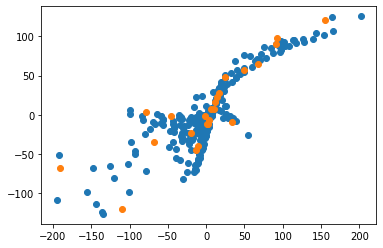

In [85]:
# Performance of the model is pretty consistent, and much better than the previous model.
# Let's plot the actual vs the estimates to see how they line up.

plt.scatter(Y, yhat)
plt.scatter(Ytest, yhattest)

In [87]:
# At this point, I'll leave this as my predictive model. It's accurate enough, given that it's built on only two predictors, 
# and without using any ml libraries or packages.

# Looking at the structure of the plots, I would like to try doing some piecewise fitting (maybe a tree based method),
# if I was allowed to use the relevant packages for it

# Let's check what beta_hat looks like now

beta_hat

array([[12.3824574 ],
       [ 2.91115922],
       [-9.78008991],
       [-1.90615373]])

In [ ]:
# My model for predicting C from A and B would therefore be:

#  C = 12.38 + 2.91*A - 9.78*B - 1.91*(A*B)